### Project 2

### Determine and examine factors that affected the ratio of vehicle loan defaulters. Also, use the findings to create a model to predict the potential defaulters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os 

In [2]:
#check working directory

os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Capstone\\Proj 2\\LoanDefault'

In [3]:
# Read the dataset to Determine and examine factors that affected the ratio of vehicle loan defaulters.

Loan=pd.read_excel('loandata_41_attribute.xlsx')

Loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


### 1. Preliminary analysis:

### 1. Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.

In [4]:
#view the dataset shape

Loan.shape

(233154, 41)

In [5]:
#view all the columns present in the dataset

Loan.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
#view the datatype of all columns present in the dataset

Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [7]:
#view the descriptive statistics of the dataframe
# five point summary of continuous variables

Loan.describe(include = 'all').round()

<ipython-input-7-3009ee9165f1>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Loan.describe(include = 'all').round()
<ipython-input-7-3009ee9165f1>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Loan.describe(include = 'all').round()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
count,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154,225493,...,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154,233154,233154.0,233154.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,2,...,NaN,NaN,NaN,NaN,NaN,NaN,192,294,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-01-01 00:00:00,Self employed,...,NaN,NaN,NaN,NaN,NaN,NaN,0yrs 0mon,0yrs 0mon,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,127635,...,NaN,NaN,NaN,NaN,NaN,NaN,119373,119127,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949-09-15 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-20 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,535918.0,54357.0,75865.0,75.0,73.0,19639.0,69.0,3397.0,NaN,NaN,...,7296.0,7180.0,13105.0,323.0,0.0,0.0,NaN,NaN,0.0,0.0
std,68316.0,12971.0,18945.0,11.0,70.0,3492.0,22.0,2238.0,NaN,NaN,...,183156.0,182593.0,151368.0,15554.0,1.0,0.0,NaN,NaN,1.0,0.0
min,417428.0,13320.0,37000.0,10.0,1.0,10524.0,45.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
25%,476786.0,47145.0,65717.0,69.0,14.0,16535.0,48.0,1511.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [8]:
#view the number of duplicate records in the dataframe

Loan.duplicated().sum()

0

In [9]:
# There are no duplicated records in the dataset

### 2. Variable names in the data may not be in accordance with the identifier naming in Python. Change the variable names accordingly.

In [10]:
# Update/ Rename the column names in the dataset

Loan_new = Loan.rename(columns = {"Date.of.Birth":"Date_of_Birth","Employment.Type":"Employment_Type",
                                  "PERFORM_CNS.SCORE":"PERFORM_CNS_SCORE","PERFORM_CNS.SCORE.DESCRIPTION":"PERFORM_CNS_SCORE_DESCRIPTION",
                                  "PRI.NO.OF.ACCTS":"PRI_NO_OF_ACCTS","PRI.ACTIVE.ACCTS":"PRI_ACTIVE_ACCTS","PRI.OVERDUE.ACCTS":"PRI_OVERDUE_ACCTS",
                                  "PRI.CURRENT.BALANCE":"PRI_CURRENT_BALANCE","PRI.SANCTIONED.AMOUNT":"PRI_SANCTIONED_AMOUNT",
                                  "PRI.DISBURSED.AMOUNT":"PRI_DISBURSED_AMOUNT","SEC.NO.OF.ACCTS":"SEC_NO_OF_ACCTS","SEC.ACTIVE.ACCTS":"SEC_ACTIVE_ACCTS",
                                  "SEC.OVERDUE.ACCTS":"SEC_OVERDUE_ACCTS","SEC.CURRENT.BALANCE":"SEC_CURRENT_BALANCE",
                                  "SEC.SANCTIONED.AMOUNT":"SEC_SANCTIONED_AMOUNT","SEC.DISBURSED.AMOUNT":"SEC_DISBURSED_AMOUNT",
                                  "PRIMARY.INSTAL.AMT":"PRIMARY_INSTAL_AMT","SEC.INSTAL.AMT":"SEC_INSTAL_AMT",
                                  "NEW.ACCTS.IN.LAST.SIX.MONTHS":"NEW_ACCTS_IN_LAST_SIX_MONTHS","DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                                  "AVERAGE.ACCT.AGE":"AVERAGE_ACCT_AGE","CREDIT.HISTORY.LENGTH":"CREDIT_HISTORY_LENGTH","NO.OF_INQUIRIES":"NO_OF_INQUIRIES"})

In [11]:
# view the Column names present in the dataset

Loan_new.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

### 3. The presented data might also contain missing values, therefore exploration will also lead to devising strategies to fill in the missing values. Devise strategies to do so whilst exploring the data.

In [12]:
#view the number of Null values in each column

print("Number of Null Values in each column")
NullValues = Loan_new.isnull().sum(axis=0)
NullValues

Number of Null Values in each column


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [13]:
# View the differnt types of Employment Type

Loan_new.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [14]:
# Manually : Categorical NA's - Employemnt Type is imputed with modal values

for i in Loan_new : 
    if Loan_new[i].dtype=='object': 
        Loan_new[i].fillna(Loan_new[i].mode()[0], inplace=True)
    
Loan_new.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

In [15]:
# View the differnt types of Employment Type

Loan_new.Employment_Type.value_counts()

Self employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

In [16]:
#### No Missing, No Duplicate Values, No null values are there in the data set Loan_new

### 2. Performing EDA:

### 4. Provide the statistical description of the quantitative data variables

In [17]:
#view the descriptive statistics of the dataframe
# five point summary of continuous variables 

Loan_new.describe().round()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,...,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0
mean,535918.0,54357.0,75865.0,75.0,73.0,19639.0,69.0,3397.0,7.0,1549.0,...,0.0,5428.0,7296.0,7180.0,13105.0,323.0,0.0,0.0,0.0,0.0
std,68316.0,12971.0,18945.0,11.0,70.0,3492.0,22.0,2238.0,4.0,975.0,...,0.0,170237.0,183156.0,182593.0,151368.0,15554.0,1.0,0.0,1.0,0.0
min,417428.0,13320.0,37000.0,10.0,1.0,10524.0,45.0,1.0,1.0,1.0,...,0.0,-574647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,476786.0,47145.0,65717.0,69.0,14.0,16535.0,48.0,1511.0,4.0,713.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,535978.0,53803.0,70946.0,77.0,61.0,20333.0,86.0,2970.0,6.0,1451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,595040.0,60413.0,79202.0,84.0,130.0,23000.0,86.0,5677.0,10.0,2362.0,...,0.0,0.0,0.0,0.0,1999.0,0.0,0.0,0.0,0.0,0.0
max,671084.0,990572.0,1628992.0,95.0,261.0,24803.0,156.0,7345.0,22.0,3795.0,...,8.0,36032852.0,30000000.0,30000000.0,25642806.0,4170901.0,35.0,20.0,36.0,1.0


### 5. How is the target variable distributed overall?

<AxesSubplot:xlabel='loan_default', ylabel='Count'>

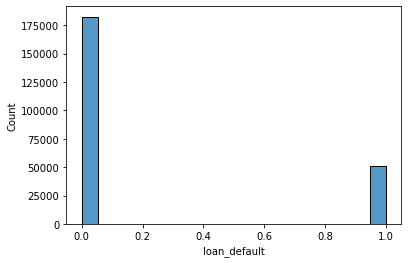

In [18]:
# View the central tendency for the target variable
# View the Histogram for loan defaulter

sns.histplot(Loan_new.loan_default)

### 6. Study the distribution of the target variable across the various categories such as branch, city, state, branch, supplier, manufacturer, etc.

In [19]:
# Check/ View the unique values of ids in different branchs

print("Total no. of Unique Ids :", Loan_new['UniqueID'].nunique())
print("Total no. of Unique Branches :", Loan_new['branch_id'].nunique())
print("Total no. of Unique Suppliers :", Loan_new['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", Loan_new['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", Loan_new['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",Loan_new['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", Loan_new['Employee_code_ID'].nunique())

Total no. of Unique Ids : 233154
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 2953
Total no. of Unique Manufactures : 11
Total no. of Unique Current pincode Ids : 6698
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3270


In [20]:
plt.rcParams['figure.figsize'] = (18,5)

<AxesSubplot:xlabel='branch_id'>

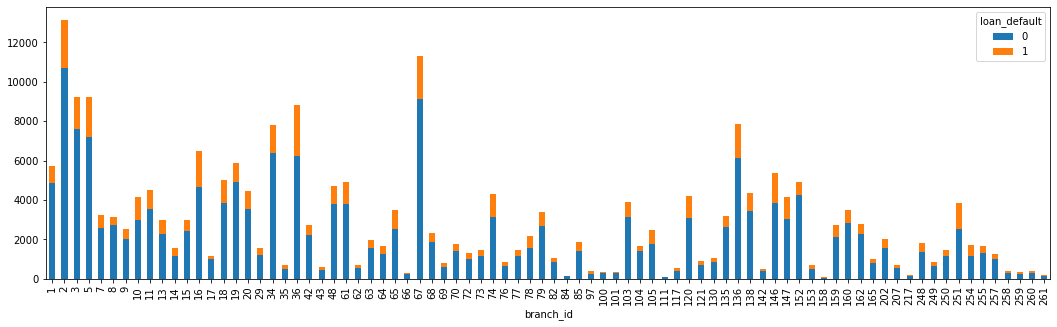

In [21]:
# View the distribution of loan default across Branch ID

p=pd.crosstab(index=Loan_new.branch_id,columns=Loan_new.loan_default)
p.plot.bar(stacked=True)

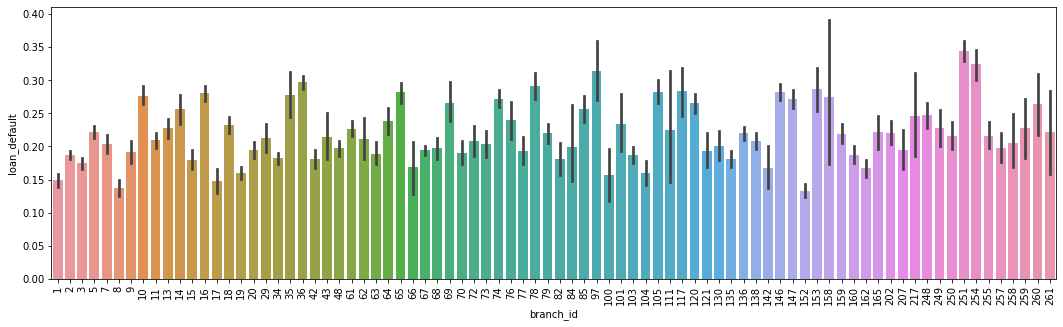

In [22]:
# View the distribution of loan default across the Branchs

sns.barplot(y = Loan_new.loan_default, x = Loan_new.branch_id)
plt.xticks(rotation=90);

In [23]:
# View the distribution of loan default across Branch ID - based on Employment Type

# sns.catplot(x="loan_default", y="branch_id", hue="Employment_Type", kind="box", data=Loan_new)

In [24]:
# View the distribution of loan default across Branch ID

# sns.displot(Loan_new, x="branch_id", hue="loan_default",multiple="dodge")

In [25]:
# View the distribution of loan default across the Suppliers

# sns.barplot(y = Loan_new.loan_default, x = Loan_new.supplier_id)
# plt.xticks(rotation=90);

In [26]:
# View the distribution of loan default across Supplier ID

# p=pd.crosstab(index=Loan_new.supplier_id,columns=Loan_new.loan_default)
# p.plot.bar(stacked=True)

<AxesSubplot:xlabel='manufacturer_id'>

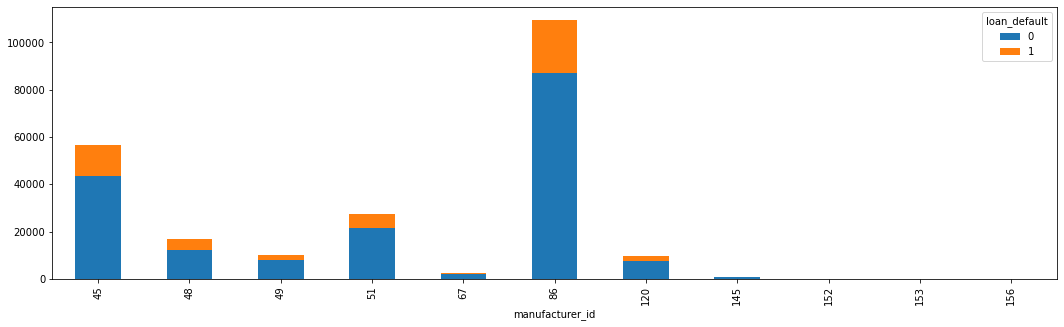

In [27]:
# View the distribution of loan default across Manufacturer ID

p=pd.crosstab(index=Loan_new.manufacturer_id,columns=Loan_new.loan_default)
p.plot.bar(stacked=True)

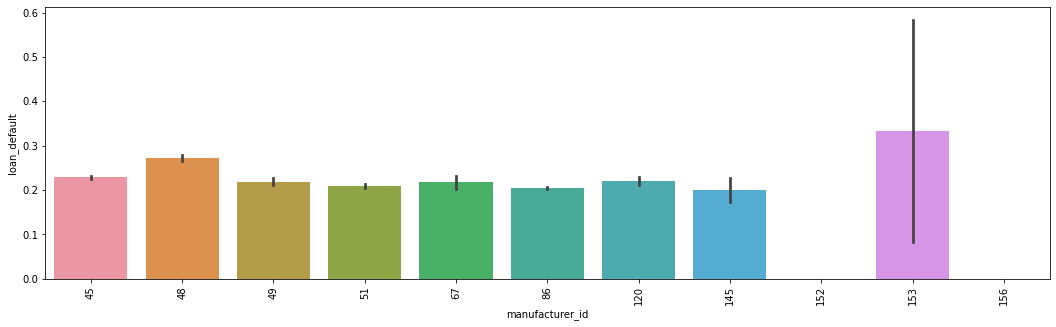

In [28]:
# View the distribution of loan default across the Manufacturers

sns.barplot(y = Loan_new.loan_default, x = Loan_new.manufacturer_id)
plt.xticks(rotation=90);

In [29]:
# View the distribution of loan default across City

# sns.barplot(y = Loan_new.loan_default, x = Loan_new.Current_pincode_ID)
# plt.xticks(rotation=90);

In [30]:
# View the distribution of loan default across Current Pincode ID

# p=pd.crosstab(index=Loan_new.Current_pincode_ID,columns=Loan_new.loan_default)
# p.plot.bar(stacked=True)

<AxesSubplot:xlabel='State_ID'>

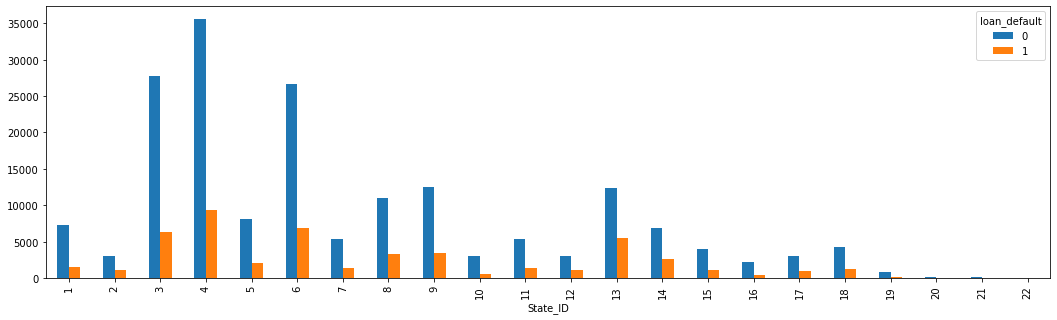

In [31]:
# View the distribution of loan default across State ID

p=pd.crosstab(index=Loan_new.State_ID,columns=Loan_new.loan_default)
p.plot.bar(stacked=False)

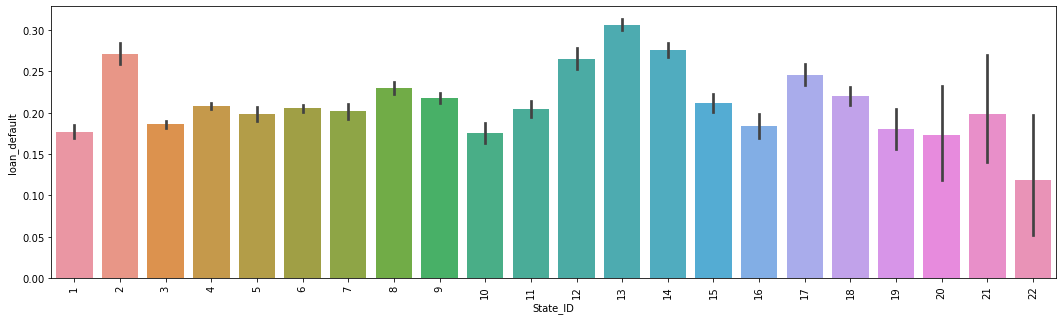

In [32]:
# View the distribution of loan default across State

sns.barplot(y = Loan_new.loan_default, x = Loan_new.State_ID)
plt.xticks(rotation=90);

### 7. What are the different employment types given in the data?

In [33]:
print("Total no. of Employment Types :", Loan_new['Employment_Type'].nunique())

Total no. of Employment Types : 2


In [34]:
# View the differnt types of Employment Type

Emp_Type = Loan_new.Employment_Type.value_counts()
Emp_Type

Self employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

### Can a strategy be developed to fill in the missing values (if any)? 

In [35]:
# The Missing values in the dataset for the variable Employment type are filled with modal value.
# No Missing values are there now in the loan dataset

### Use pie charts to express how different types of employment defines defaulter and non-defaulters.

In [36]:
plt.rcParams['figure.figsize'] = (2,3)

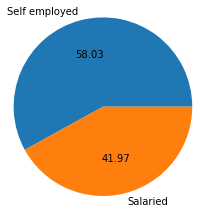

In [37]:
# View the distribution of differnt Employment Types

plt.pie(x=Emp_Type.values,labels=Emp_Type.index, autopct='%.2f' ,radius=2 );
#plt.pie(x=[0,1], colors='w')

In [38]:
# View the distribution of Employment type grouped by loan defaulters

Emp_loan_default=Loan_new.groupby(['Employment_Type', 'loan_default']).size()
Emp_loan_default

Employment_Type  loan_default
Salaried         0                77948
                 1                19910
Self employed    0               104595
                 1                30701
dtype: int64

In [39]:
# Calculate the percentage of different Employment type grouped by loan default

Emp_loan_prct=Emp_loan_default.apply(lambda x: 100*x/Emp_loan_default.sum())
Emp_loan_prct

Employment_Type  loan_default
Salaried         0               33.431981
                 1                8.539420
Self employed    0               44.860907
                 1               13.167692
dtype: float64

In [40]:
plt.rcParams['figure.figsize'] = (3,10)

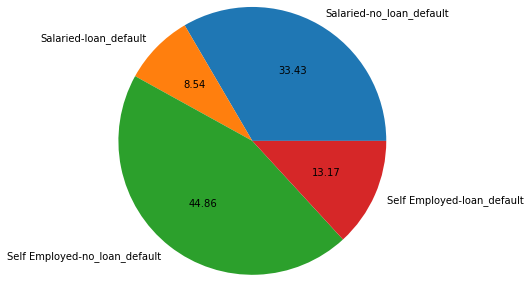

In [41]:
# View the distribution of Employment type grouped by loan defaulters

mylabel= "Salaried-no_loan_default","Salaried-loan_default","Self Employed-no_loan_default","Self Employed-loan_default"
plt.pie(x=Emp_loan_default.values,labels=mylabel, autopct='%.2f' ,radius=2 );
# plt.pie(x=[0,1], colors='w')


### 8. Has age got something to do with defaulting? What is the distribution of age w.r.t. to defaulters and non-defaulters?

In [42]:
# Loan Default dataset has only Date of Birth column. 
# Using datetime package extracted the Age to determine the distribution of age

In [43]:
# importing date function from the datetime package
# Today's date will be stored in the field today

from datetime import date
today = date.today()

In [44]:
# Extracting Birth Year from the Date of Birth field

Loan_new['Birth_Year'] = Loan_new['Date_of_Birth'].dt.year

In [45]:
# Extracting Birth Month from the Date of Birth field

Loan_new['Birth_Month'] = Loan_new['Date_of_Birth'].dt.month

In [46]:
# Extracting Birth Day from the Date of Birth field

Loan_new['Birth_Day'] = Loan_new['Date_of_Birth'].dt.day

In [47]:
# Calculating the Difference from today month

Loan_new['Diff_month'] = (today.month)<(Loan_new['Birth_Month'])

In [48]:
# Calculating the difference from today

Loan_new['Diff_day'] = (today.day)<(Loan_new['Birth_Day'])

In [49]:
# Calculating the Age by subtracting Birth Year from today year
# If today month or today is less than the given birthdate then subtract 1 more or leave as it is.
# Sotred the Age in the dataset with a new column 'Age'

Loan_new['Age'] = today.year - Loan_new['Birth_Year'] - (Loan_new['Diff_month'] | Loan_new['Diff_day'])


In [50]:
Loan_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Birth_Year,Birth_Month,Birth_Day,Diff_month,Diff_day,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0yrs 0mon,0yrs 0mon,0,0,1984,1,1,False,False,37
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0yrs 0mon,0yrs 0mon,0,0,1985,8,24,False,False,36
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0yrs 0mon,0yrs 0mon,1,1,1977,12,9,False,False,44
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0yrs 0mon,0yrs 0mon,0,0,1988,6,1,False,False,33
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0yrs 0mon,0yrs 0mon,0,0,1994,7,14,False,False,27


In [51]:
plt.rcParams['figure.figsize'] = (10,5)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

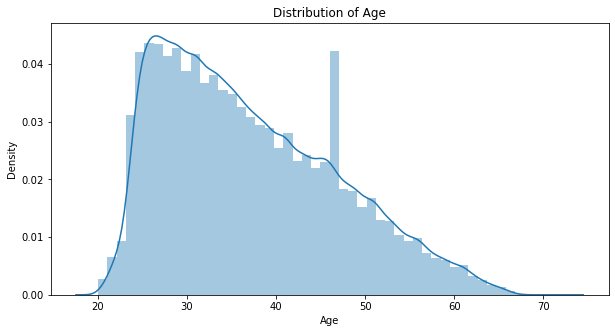

In [52]:
# View the distribution of the Age in the dataset

sns.distplot(Loan_new['Age'])
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

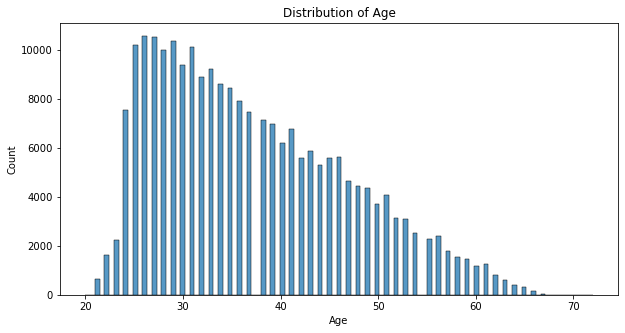

In [53]:
# View the distribution of the Age in the dataset

sns.histplot(Loan_new['Age'])
plt.title('Distribution of Age')

In [54]:
LoanDefault_group = Loan_new.groupby('loan_default')

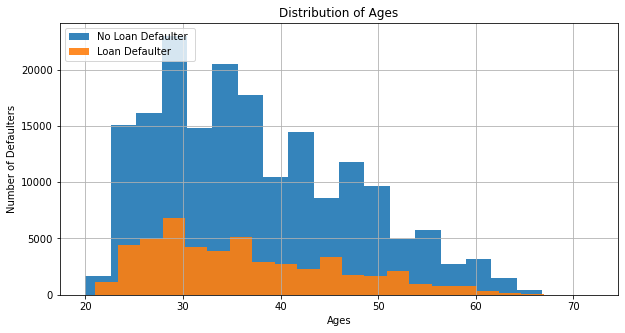

In [55]:
# View the distribution of Loan Defaulters across different ages

LoanDefault_group['Age'].hist(bins=20, alpha=0.9)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of Defaulters')
plt.legend(('No Loan Defaulter ', 'Loan Defaulter'), loc = 'upper left')
plt.show()

### 9. What type of ID was presented by most of the customers as proof?

In [56]:
print("Total no. Customers presented Aadhar Card as proof :", Loan_new['Aadhar_flag'].value_counts()[1])
print("Total no. Customers presented PAN Card as proof :", Loan_new['PAN_flag'].value_counts()[1])
print("Total no. Customers presented VoterID Card as proof :", Loan_new['VoterID_flag'].value_counts()[1])
print("Total no. Customers presented Driving Card as proof :", Loan_new['Driving_flag'].value_counts()[1])
print("Total no. Customers presented Passport Card as proof :", Loan_new['Passport_flag'].value_counts()[1])

Total no. Customers presented Aadhar Card as proof : 195924
Total no. Customers presented PAN Card as proof : 17621
Total no. Customers presented VoterID Card as proof : 33794
Total no. Customers presented Driving Card as proof : 5419
Total no. Customers presented Passport Card as proof : 496


In [57]:
# Chart

In [58]:
# Aadhar card was presented by most of the customers as proof.

### Performing EDA

### 10. Study the credit bureau score distribution. How is the distribution for defaulters vs non-defaulters? Explore in detail.

### Credit bureau score distribution

In [59]:
plt.rcParams['figure.figsize'] = (10,5)

In [60]:
Loan_new['PERFORM_CNS_SCORE'].describe().round()

count    233154.0
mean        289.0
std         338.0
min           0.0
25%           0.0
50%           0.0
75%         678.0
max         890.0
Name: PERFORM_CNS_SCORE, dtype: float64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Bureau score')

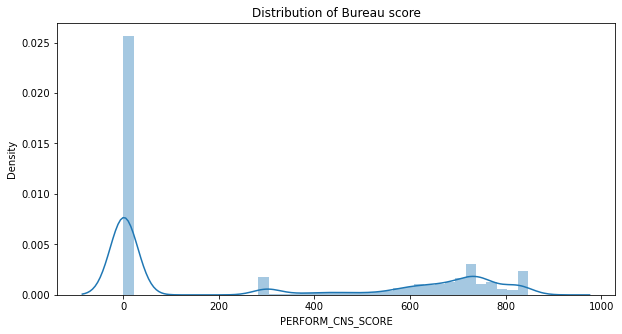

In [61]:
# View the distribution of Bureau Score

sns.distplot(Loan_new['PERFORM_CNS_SCORE'])
plt.title('Distribution of Bureau score')

Text(0.5, 1.0, 'Distribution of Bureau score')

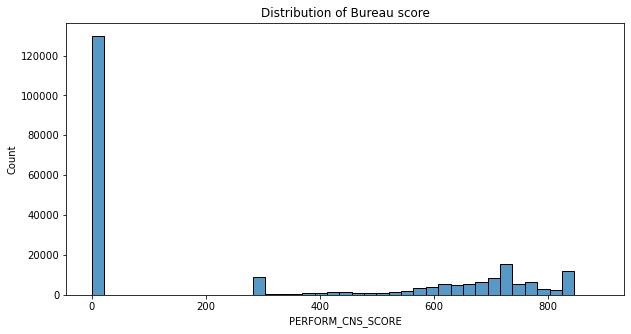

In [62]:
# View the distribution of Bureau Score

sns.histplot(Loan_new['PERFORM_CNS_SCORE'])
plt.title('Distribution of Bureau score')

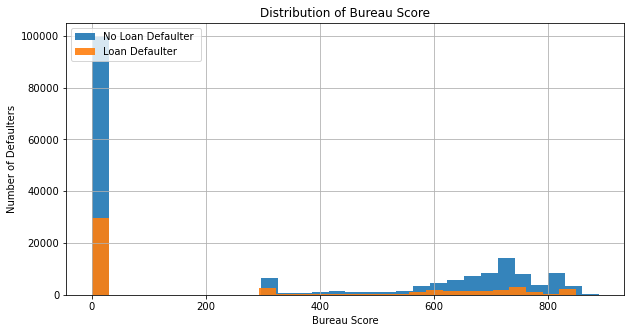

In [63]:
# View the distribution of Loan Defaulters across different Bureau Score

LoanDefault_group['PERFORM_CNS_SCORE'].hist(bins=30, alpha=0.9)
plt.title('Distribution of Bureau Score')
plt.xlabel('Bureau Score')
plt.ylabel('Number of Defaulters')
plt.legend(('No Loan Defaulter ', 'Loan Defaulter'), loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='Density'>

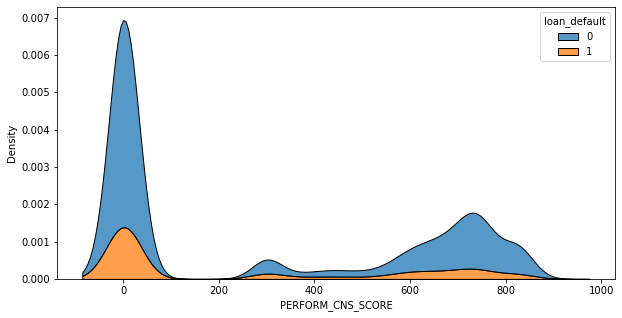

In [64]:
# View the distribution of Loan Defaulters across different Bureau Score

sns.kdeplot(data=Loan_new, x="PERFORM_CNS_SCORE", hue="loan_default", multiple="stack")

### Credit Bureau score description

In [65]:
plt.rcParams['figure.figsize'] = (19, 6)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


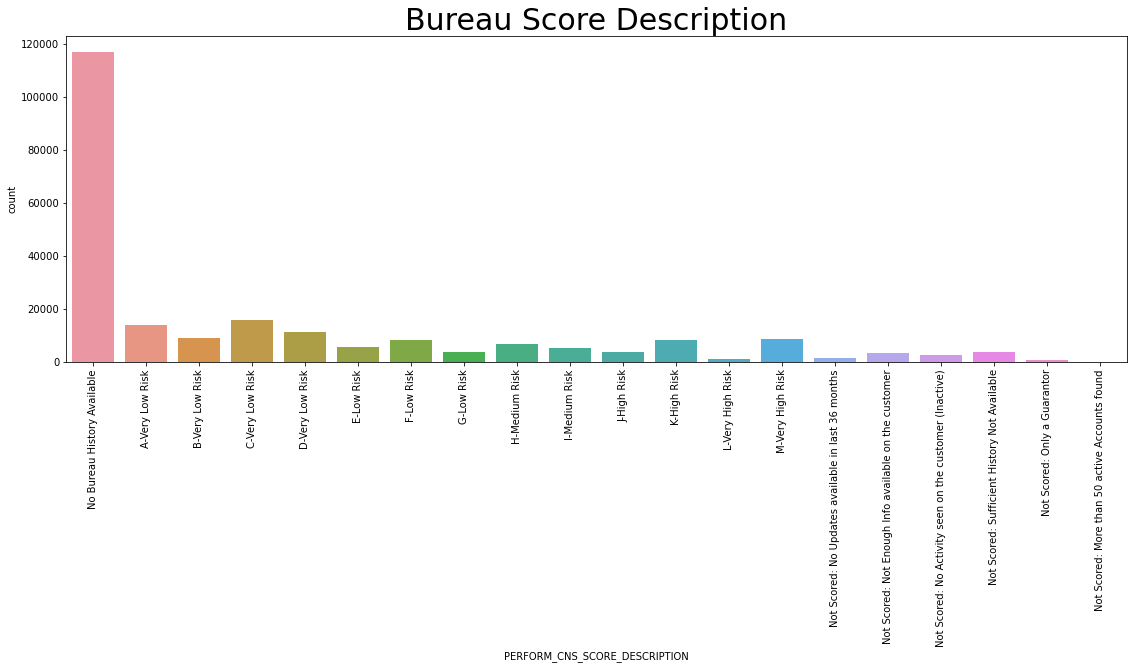

In [66]:
# View the bureau score description

sns.countplot(Loan_new['PERFORM_CNS_SCORE_DESCRIPTION'])
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION'>

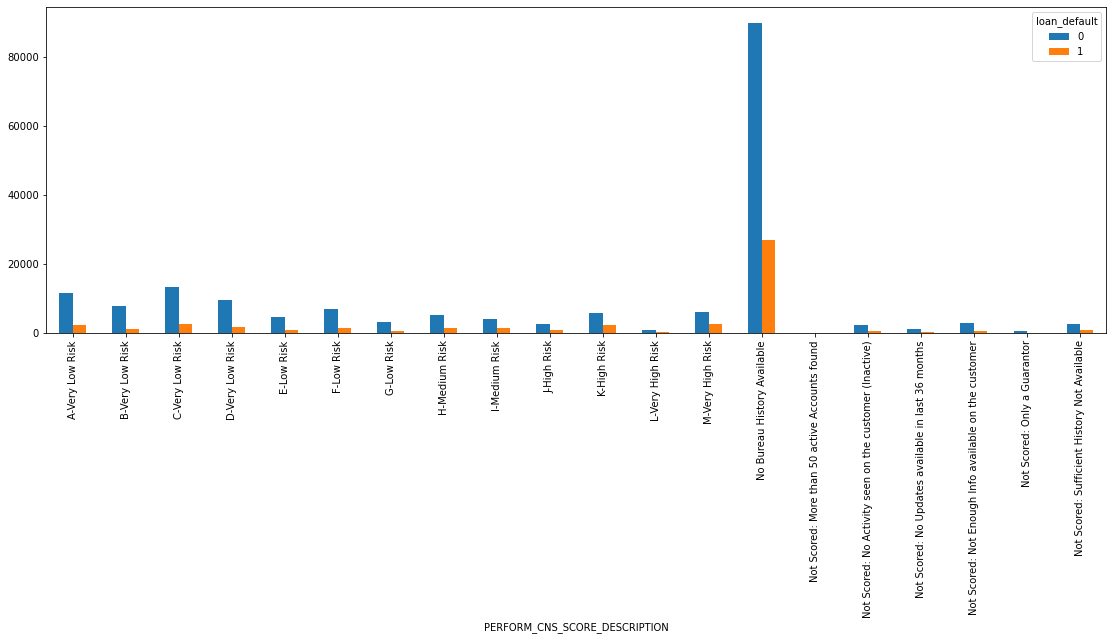

In [67]:
# View the distribution of loan default across Bureau Score Description

p=pd.crosstab(index=Loan_new['PERFORM_CNS_SCORE_DESCRIPTION'],columns=Loan_new['loan_default'])
p.plot.bar(stacked=False)

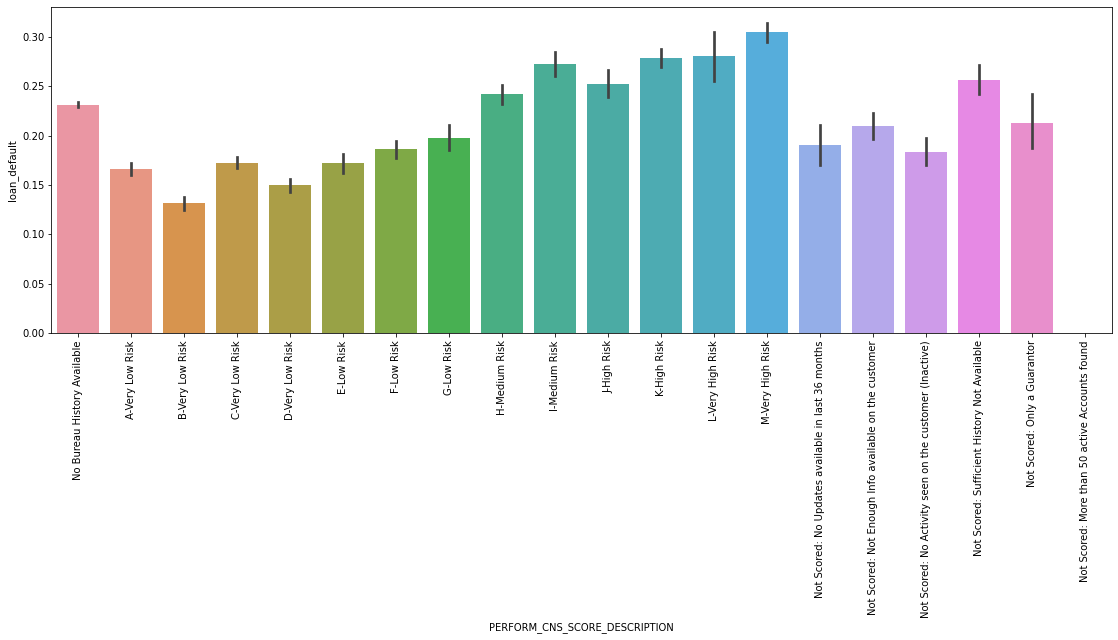

In [68]:
# View the distribution of loan default across Bureau Score Description/ PERFORM_CNS_SCORE_DESCRIPTION

sns.barplot(y = Loan_new.loan_default, x = Loan_new.PERFORM_CNS_SCORE_DESCRIPTION)
plt.xticks(rotation=90);

### 11. Explore the primary and secondary account details. Is the information in some way related to loan default probability ?

In [69]:
# View the primary account details

Loan_new.loc[:,['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS',
                'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','loan_default']]

,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,loan_default
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
233149,1,0,0,0,0,0,0
233150,1,1,1,0,464727,464727,0
233151,68,65,1,96524920,105865712,105755712,0
233152,72,52,1,23286804,33280996,33280996,0


In [70]:
# View the five point statistical analysis on the Primary accounts with respect to loan default and non_defaulters

PRI_acct_non_default = Loan_new[Loan_new['loan_default']==0]['PRI_NO_OF_ACCTS']
PRI_acct_default = Loan_new[Loan_new['loan_default']==1]['PRI_NO_OF_ACCTS']

In [71]:
pd.DataFrame([PRI_acct_non_default.describe(), PRI_acct_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,2.538038,5.261142,0.0,0.0,1.0,3.0,354.0
defaulters,50611.0,2.089328,5.040134,0.0,0.0,0.0,2.0,453.0


In [72]:
plt.rcParams['figure.figsize'] = (7,5)

<AxesSubplot:xlabel='loan_default', ylabel='PRI_NO_OF_ACCTS'>

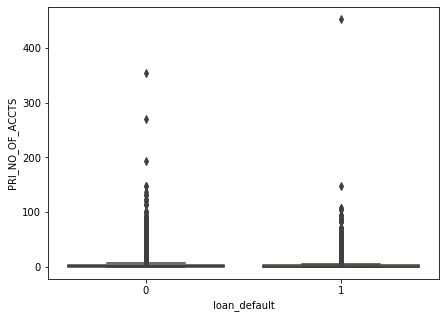

In [73]:
sns.boxplot(y=Loan_new.PRI_NO_OF_ACCTS,x=Loan_new.loan_default)

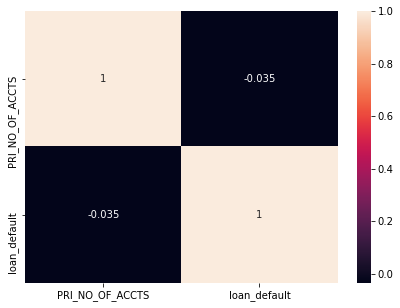

In [74]:
#Checking the correlation between primary and loan deafult vairable

sns.heatmap(Loan_new[['PRI_NO_OF_ACCTS','loan_default']].corr(),annot=True)
plt.show()

In [75]:
# View the Secondary account details

Loan_new.loc[:,['SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS',
                'SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','loan_default']]

,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,loan_default
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
233149,0,0,0,0,0,0,0
233150,0,0,0,0,0,0,0
233151,0,0,0,0,0,0,0
233152,0,0,0,0,0,0,0


In [76]:
# View the five point statistical analysis on the Primary accounts with respect to loan default and non_defaulters

SEC_acct_non_default = Loan_new[Loan_new['loan_default']==0]['SEC_NO_OF_ACCTS']
SEC_acct_default = Loan_new[Loan_new['loan_default']==1]['SEC_NO_OF_ACCTS']

In [77]:
pd.DataFrame([SEC_acct_non_default.describe(), SEC_acct_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,0.061848,0.651657,0.0,0.0,0.0,0.0,52.0
defaulters,50611.0,0.049100,0.527358,0.0,0.0,0.0,0.0,38.0


<AxesSubplot:xlabel='loan_default', ylabel='SEC_NO_OF_ACCTS'>

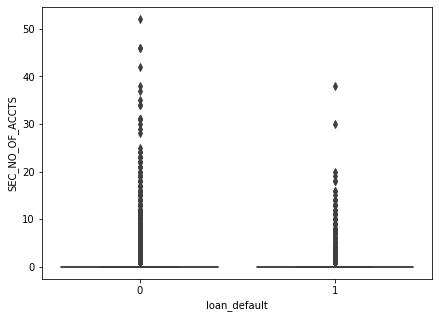

In [78]:
sns.boxplot(y=Loan_new.SEC_NO_OF_ACCTS,x=Loan_new.loan_default)

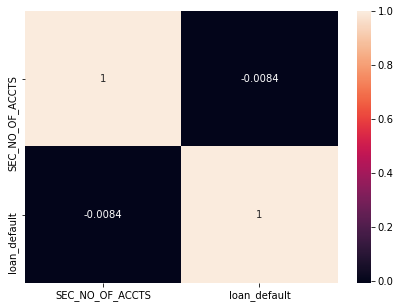

In [79]:
#Checking the correlation between secondary and loan deafult vairable

sns.heatmap(Loan_new[['SEC_NO_OF_ACCTS','loan_default']].corr(),annot=True)
plt.show()

In [80]:
# View the number of records are in loan default and in non default

Loan_count = Loan_new.loan_default.value_counts()
Loan_count

0    182543
1     50611
Name: loan_default, dtype: int64

In [81]:
plt.rcParams['figure.figsize'] = (5,3)

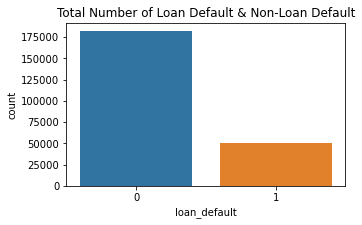

In [82]:
# View the number of records

sns.countplot(x='loan_default', data=Loan_new)
plt.title('Total Number of Loan Default & Non-Loan Default')
plt.show()

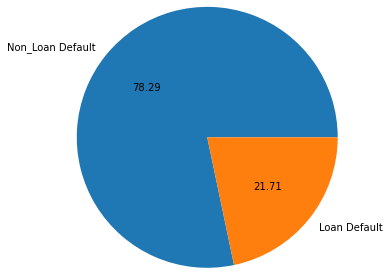

In [83]:
# View the Percentage of Loan Default and Non-Default records

mylabel = 'Non_Loan Default','Loan Default'
plt.pie(x=Loan_count.values,labels=mylabel, autopct='%.2f' ,radius=2 );

In [84]:
# Group the records by Loan default field

Loan_Default_Group = Loan_new.groupby('loan_default')

In [85]:
# View the Mean for the Primary accounts

Loan_Default_Group[['PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS',
                'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT']].mean()

,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT
loan_default,,,,,
0,2.538038,0.144738,179487.579310,232639.504977,232032.569192
1,2.089328,0.199146,116892.876015,167519.604967,167691.119658


In [86]:
# View the Mean for the Secondary accounts

Loan_Default_Group[['SEC_NO_OF_ACCTS','SEC_OVERDUE_ACCTS',
                'SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT']].mean()

,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT
loan_default,,,,,
0,0.061848,0.007324,5923.621344,7908.738253,7780.733893
1,0.049100,0.006955,3639.445891,5085.631681,5013.272154


In [87]:
# The Mean/average values of the secondary account details are lower than the Mean/average value of the primary account details 
# for both Loan defaulters and non-loan defaulters

### 12. Is there a difference between the sanctioned and disbursed amount of primary & secondary loans. Study the difference by providing apt statistics and graphs.

In [88]:
Loan_new.loc[:,['PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT','SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT']]

,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
233149,0,0,0,0
233150,464727,464727,0,0
233151,105865712,105755712,0,0
233152,33280996,33280996,0,0


In [89]:
# View the number of records with difference between the Sanctioned Amount and Disbursed Amount in Primary Loan accounts

Primary_account = Loan_new[((Loan_new.PRI_SANCTIONED_AMOUNT - Loan_new.PRI_DISBURSED_AMOUNT)>0)]
Primary_account.shape

(9370, 47)

In [90]:
# 9370 records has difference in the sanctioned amount and disbursed amount

In [91]:
# View the number of Primary loan accounts defaulters count with difference between the sanctioned amount and disbursed amount.

Primary_account_group = Primary_account.loan_default.value_counts()
Primary_account_group

0    8451
1     919
Name: loan_default, dtype: int64

In [92]:
# Out of 9370 records 919 are defaulters with difference in the amount

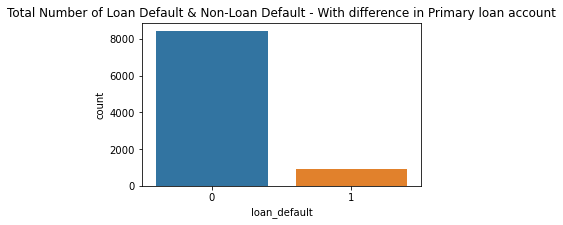

In [93]:
# View the number of records

sns.countplot(x='loan_default', data=Primary_account)
plt.title('Total Number of Loan Default & Non-Loan Default - With difference in Primary loan account')
plt.show()

In [94]:
# View the number of records with difference between the Sanctioned Amount and Disbursed Amount in Secondary Loan accounts

Secondary_account = Loan_new[((Loan_new.SEC_SANCTIONED_AMOUNT - Loan_new.SEC_DISBURSED_AMOUNT)>0)]
Secondary_account.shape

(502, 47)

In [95]:
# 502 records in the secondary loan accounts has difference in the sanctioned amount and disbursed amount

In [96]:
# View the number of Secondary loan accounts defaulters count with difference between the sanctioned amount and disbursed amount.

Secondary_account_group = Secondary_account.loan_default.value_counts()
Secondary_account_group

0    420
1     82
Name: loan_default, dtype: int64

In [97]:
# Out of 502 records, 82 are in defaulters list with difference in the amount

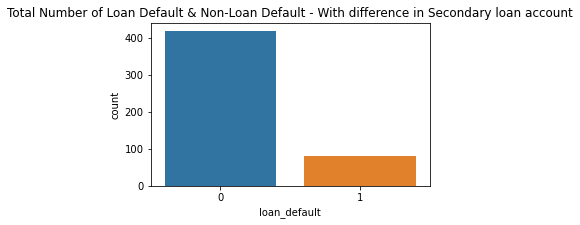

In [98]:
# View the number of records

sns.countplot(x='loan_default', data=Secondary_account)
plt.title('Total Number of Loan Default & Non-Loan Default - With difference in Secondary loan account')
plt.show()

In [99]:
# - Statistics and graphs 

### 13. Do customer who make higher no. of enquiries end up being higher risk candidates? 

In [100]:
# View the Count of total number of enquiries made by the customers

Enquiries_counts = Loan_new['NO_OF_INQUIRIES'].value_counts()
Enquiries_counts_percent = Loan_new['NO_OF_INQUIRIES'].value_counts(normalize=True)*100
pd.DataFrame({'Counts':Enquiries_counts,'Percent_of_data':Enquiries_counts_percent})

,Counts,Percent_of_data
0,201961,86.621289
1,22285,9.558060
2,5409,2.319926
3,1767,0.757868
4,760,0.325965
5,343,0.147113
6,239,0.102507
7,135,0.057902
8,105,0.045035
9,44,0.018872


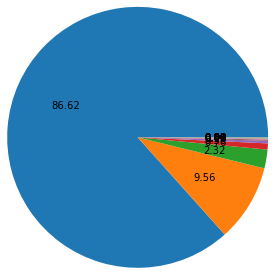

In [101]:
# View the Percentage of Loan Default and Non-Default records

#mylabel = 'Non_Loan Default','Loan Default'
plt.pie(x=Enquiries_counts.values, autopct='%.2f' ,radius=2 );

In [102]:
plt.rcParams['figure.figsize'] = (18,8)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of Inquiries')

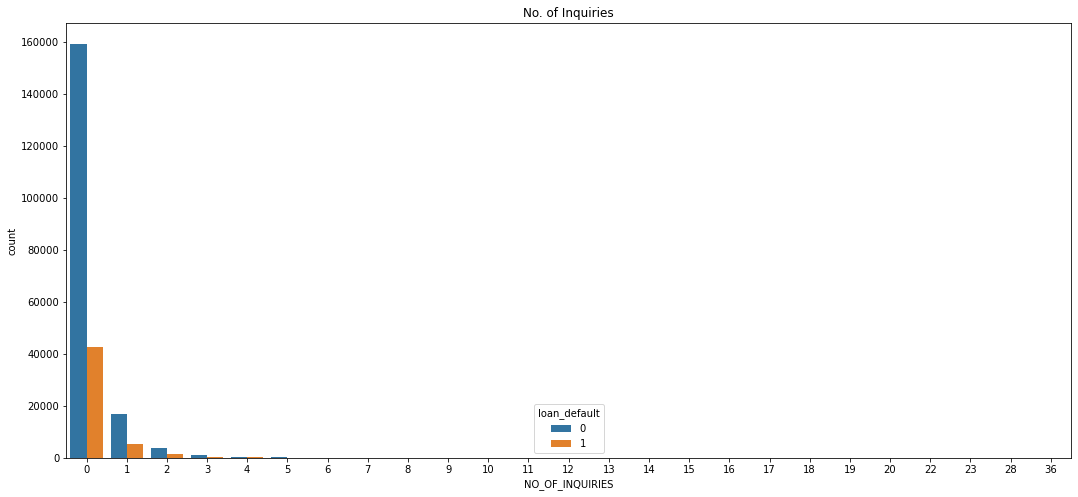

In [103]:
# View the number of enquiries made

sns.countplot(Loan_new.NO_OF_INQUIRIES, hue=Loan_new.loan_default)
plt.title('No. of Inquiries')

In [104]:
# Customers who make higher no. of enquiries doesn't end up being higher risk candidates

### 14. Is credit history, i.e. new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

#### Credit History Length - Duration

In [105]:
# Function defined to return the credit history duration from the credit history length field

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [106]:
# Credit history duration is stored in a new field 

Loan_new['CREDIT_HISTORY_DURATION'] = Loan_new['CREDIT_HISTORY_LENGTH'].apply(duration)
Loan_new['CREDIT_HISTORY_DURATION'].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT_HISTORY_DURATION, dtype: float64

In [107]:
plt.rcParams['figure.figsize'] = (10,5)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


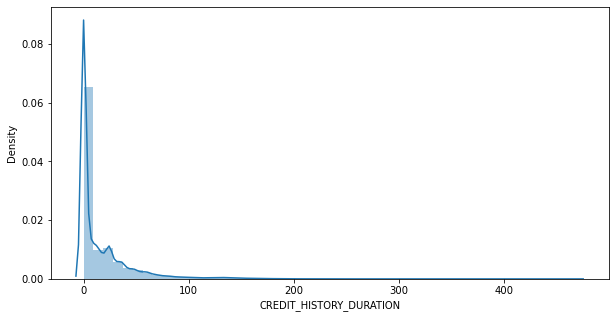

In [108]:
# View the distribution of the credit history length

sns.distplot(Loan_new['CREDIT_HISTORY_DURATION'])
plt.show()

<AxesSubplot:xlabel='CREDIT_HISTORY_DURATION', ylabel='Density'>

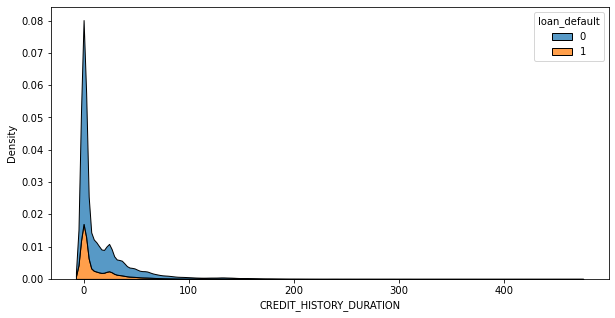

In [109]:
# View the distribution of Loan Defaulters across different Credit history duration

sns.kdeplot(data=Loan_new, x="CREDIT_HISTORY_DURATION", hue="loan_default", multiple="stack")

#### No of customers with New Loan accounts in last six months

In [110]:
New_acct_counts = Loan_new['NEW_ACCTS_IN_LAST_SIX_MONTHS'].value_counts()
New_acct_counts

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
21         1
22         1
28         1
35         1
Name: NEW_ACCTS_IN_LAST_SIX_MONTHS, dtype: int64

In [111]:
plt.rcParams['figure.figsize'] = (18,8)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of New accounts in last 6 months')

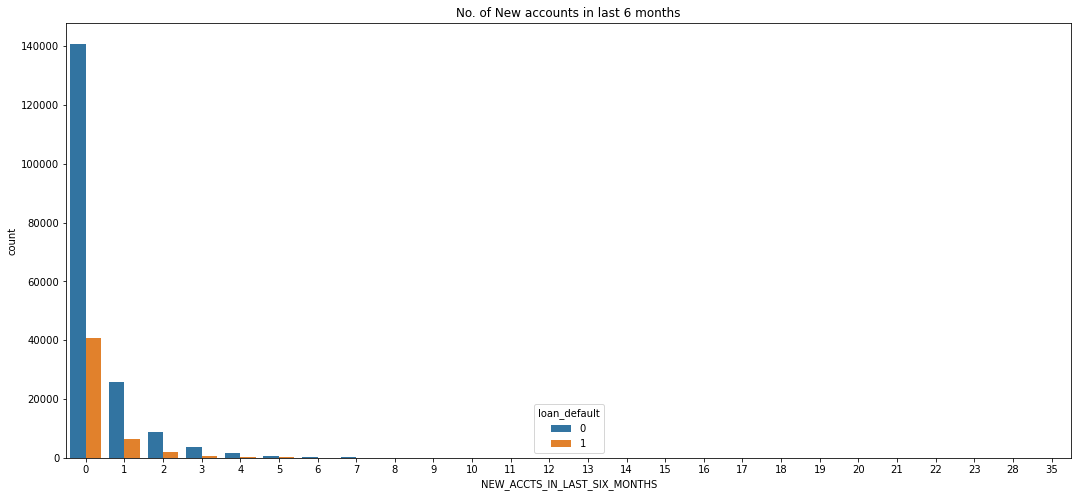

In [112]:
# View the number of Customers with New accounts and defaulters count

sns.countplot(Loan_new.NEW_ACCTS_IN_LAST_SIX_MONTHS, hue=Loan_new.loan_default)
plt.title('No. of New accounts in last 6 months')

#### No of customers with Delinquent Loan accounts in last six months

In [113]:
Delinquent_acct_counts = Loan_new['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].value_counts()
Delinquent_acct_counts

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
11         3
12         3
9          2
10         2
20         1
Name: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of New accounts in last 6 months')

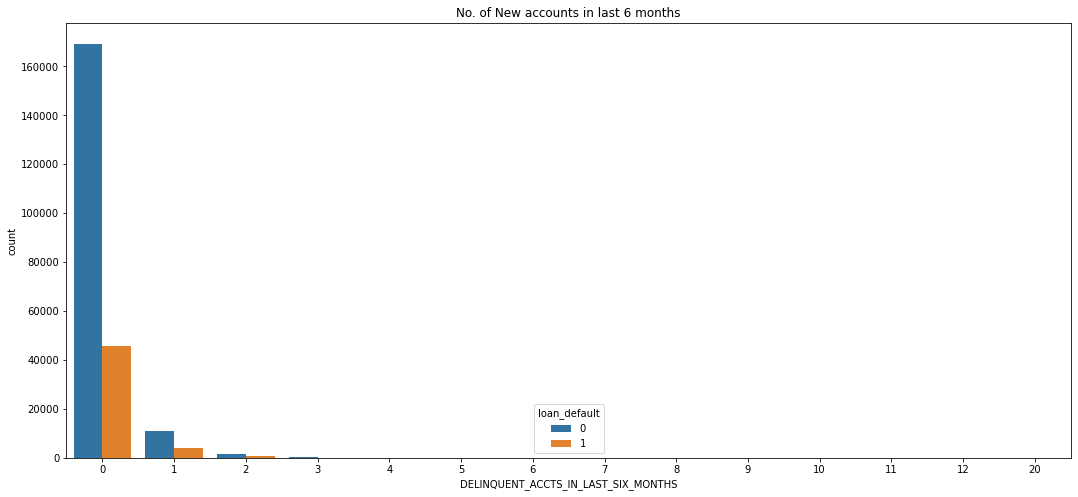

In [114]:
# View the number of Customers with Delinquent Loan accounts and defaulters count

sns.countplot(Loan_new.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, hue=Loan_new.loan_default)
plt.title('No. of New accounts in last 6 months')

### 15. Perform logistic regression modelling, predict the outcome for the test data, and validate the results using the confusion matrix.

#### Endcoding

In [115]:
# Encodings for type of employments

Loan_new['Employment_Type'] = Loan_new['Employment_Type'].replace(('Self employed', 'Salaried'), (2, 1))

# checking the values  of employement type
Loan_new['Employment_Type'].value_counts()

2    135296
1     97858
Name: Employment_Type, dtype: int64

In [116]:
# Average account duration is stored in a new field 

Loan_new['AVERAGE_ACCT_DURATION'] = Loan_new['AVERAGE_ACCT_AGE'].apply(duration)
Loan_new['AVERAGE_ACCT_DURATION'].describe()

count    233154.000000
mean          8.915764
std          15.106416
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: AVERAGE_ACCT_DURATION, dtype: float64

#### Removing the unnecessary fields/ Calculated fields from the Dataset

In [117]:
#View all the column names

Loan_new.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default', 'Birth_Year', 'Birth_Month', 'Birth_Day', 'Diff_month',
       'Diff_day', 'Age', 'CREDIT_HISTOR

In [118]:
# Drop columns 

LoanData = pd.DataFrame(Loan_new.drop(['UniqueID','Date_of_Birth','DisbursalDate','MobileNo_Avl_Flag','Aadhar_flag',
                                       'PAN_flag','VoterID_flag','Driving_flag','Passport_flag',
                                       'PERFORM_CNS_SCORE_DESCRIPTION','AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','Birth_Year',
                                       'Birth_Month','Birth_Day','Diff_day','Diff_month'],axis=1))

In [119]:
# View the necessary columns in the dataset

LoanData.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment_Type', 'State_ID',
       'Employee_code_ID', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'loan_default', 'Age', 'CREDIT_HISTORY_DURATION',
       'AVERAGE_ACCT_DURATION'],
      dtype='object')

#### Colinearity between the fields

In [120]:
plt.rcParams['figure.figsize'] = (20,18)

<AxesSubplot:>

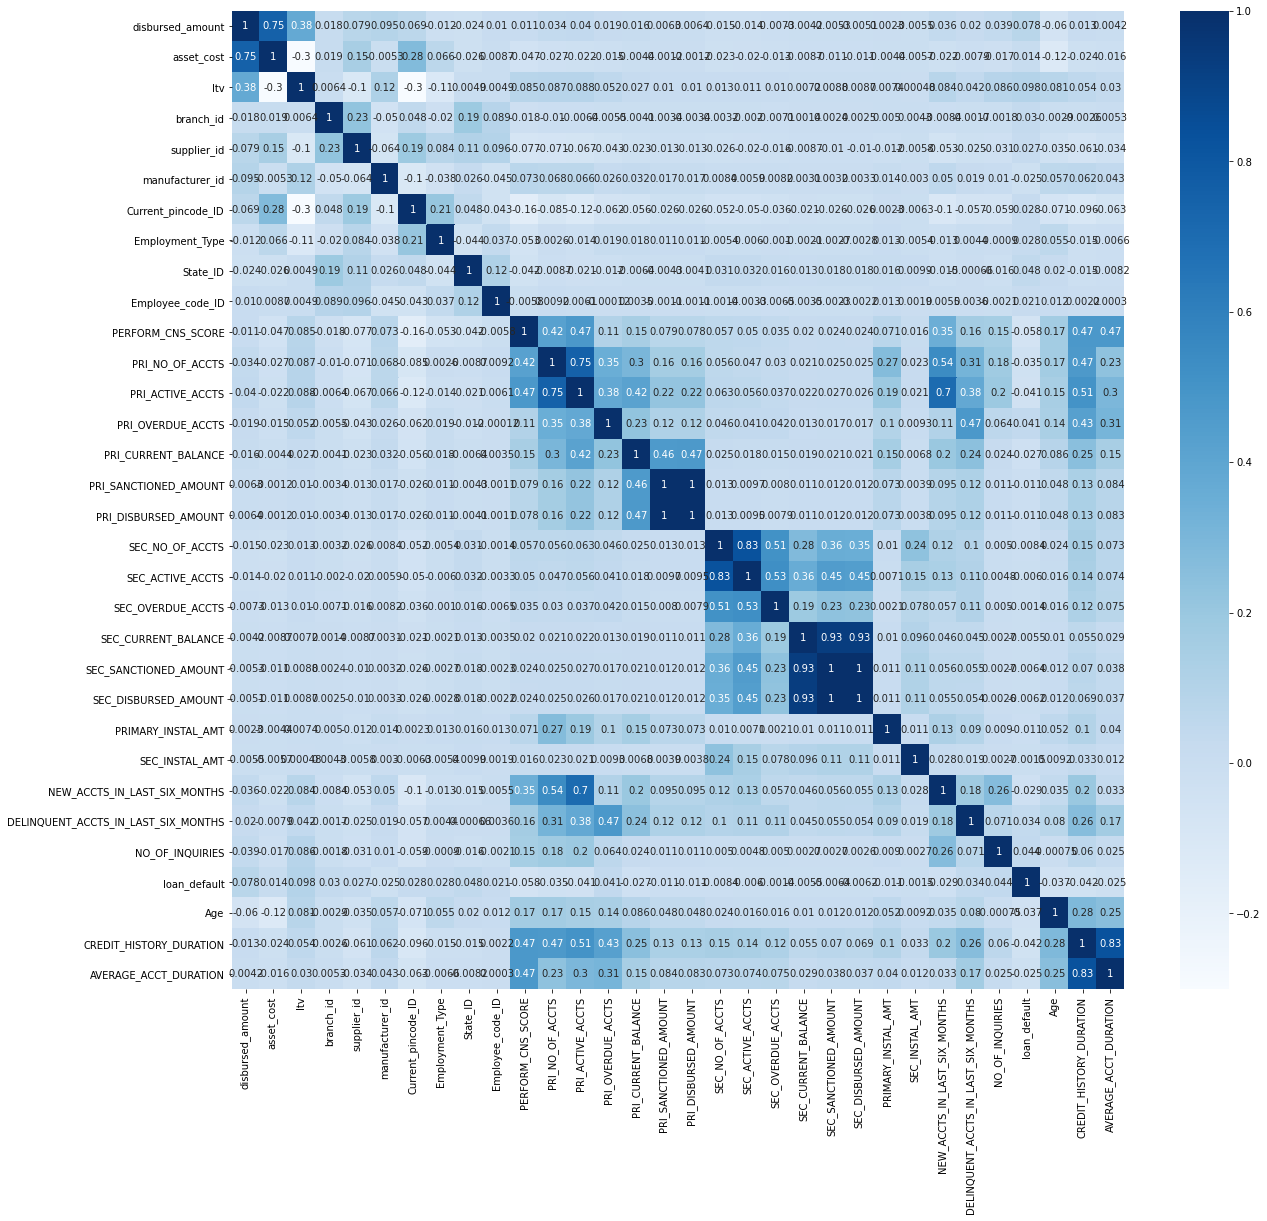

In [121]:
# View the Corelation between all the variables

colinearity_CVD=LoanData.corr()

sns.heatmap(colinearity_CVD, annot=True, cmap='Blues' )

In [122]:
# View the relationship between the variables using pair plot

# sns.pairplot(LoanData)

#### Continuous and Categorical variables

In [123]:
LoanData.describe(include = 'all').round()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,Age,CREDIT_HISTORY_DURATION,AVERAGE_ACCT_DURATION
count,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,...,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0
mean,54357.0,75865.0,75.0,73.0,19639.0,69.0,3397.0,2.0,7.0,1549.0,...,7180.0,13105.0,323.0,0.0,0.0,0.0,0.0,37.0,16.0,9.0
std,12971.0,18945.0,11.0,70.0,3492.0,22.0,2238.0,0.0,4.0,975.0,...,182593.0,151368.0,15554.0,1.0,0.0,1.0,0.0,10.0,29.0,15.0
min,13320.0,37000.0,10.0,1.0,10524.0,45.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0
25%,47145.0,65717.0,69.0,14.0,16535.0,48.0,1511.0,1.0,4.0,713.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0
50%,53803.0,70946.0,77.0,61.0,20333.0,86.0,2970.0,2.0,6.0,1451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0
75%,60413.0,79202.0,84.0,130.0,23000.0,86.0,5677.0,2.0,10.0,2362.0,...,0.0,1999.0,0.0,0.0,0.0,0.0,0.0,44.0,24.0,13.0
max,990572.0,1628992.0,95.0,261.0,24803.0,156.0,7345.0,2.0,22.0,3795.0,...,30000000.0,25642806.0,4170901.0,35.0,20.0,36.0,1.0,72.0,468.0,369.0


In [124]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   Employment_Type                      233154 non-null  int64  
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  PERFORM_CNS_SCORE                    233154 non-null  int64  
 11  PRI_NO_OF_ACC

In [125]:
# Convert the categorical variables into category dtype

LoanData.branch_id=pd.Categorical(LoanData.branch_id)
LoanData.supplier_id=pd.Categorical(LoanData.supplier_id)
LoanData.manufacturer_id=pd.Categorical(LoanData.manufacturer_id)
LoanData.Current_pincode_ID=pd.Categorical(LoanData.Current_pincode_ID)
LoanData.Employment_Type=pd.Categorical(LoanData.Employment_Type)
LoanData.State_ID=pd.Categorical(LoanData.State_ID)
LoanData.Employee_code_ID=pd.Categorical(LoanData.Employee_code_ID)
LoanData.PERFORM_CNS_SCORE=pd.Categorical(LoanData.PERFORM_CNS_SCORE)
LoanData.loan_default=pd.Categorical(LoanData.loan_default)

In [126]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   disbursed_amount                     233154 non-null  int64   
 1   asset_cost                           233154 non-null  int64   
 2   ltv                                  233154 non-null  float64 
 3   branch_id                            233154 non-null  category
 4   supplier_id                          233154 non-null  category
 5   manufacturer_id                      233154 non-null  category
 6   Current_pincode_ID                   233154 non-null  category
 7   Employment_Type                      233154 non-null  category
 8   State_ID                             233154 non-null  category
 9   Employee_code_ID                     233154 non-null  category
 10  PERFORM_CNS_SCORE                    233154 non-null  category
 11  

#### Separate continuous and categorical variables

In [127]:
# Separate continuous variables

LoanData_continuous=LoanData.describe().columns
LoanData_continuous

Index(['disbursed_amount', 'asset_cost', 'ltv', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'Age',
       'CREDIT_HISTORY_DURATION', 'AVERAGE_ACCT_DURATION'],
      dtype='object')

In [128]:
# View the dataframe with continuous variables

LoanData[LoanData_continuous].head()

,disbursed_amount,asset_cost,ltv,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Age,CREDIT_HISTORY_DURATION,AVERAGE_ACCT_DURATION
0,50578,58400,89.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37,0,0
1,53278,61360,89.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0
2,52378,60300,88.39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,44,0,0
3,46349,61500,76.42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33,0,0
4,43594,78256,57.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27,0,0


In [129]:
# Separate categorical variables

LoanData_categorical= LoanData.columns.drop(LoanData_continuous)
LoanData_categorical

Index(['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_Type', 'State_ID', 'Employee_code_ID', 'PERFORM_CNS_SCORE',
       'loan_default'],
      dtype='object')

In [130]:
# View the dataframe with categorical variables

LoanData[LoanData_categorical].head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,PERFORM_CNS_SCORE,loan_default
0,67,22807,45,1441,1,6,1998,0,0
1,67,22807,45,1497,2,6,1998,0,0
2,67,22807,45,1495,2,6,1998,0,1
3,67,22807,45,1502,1,6,1998,0,0
4,67,22744,86,1499,2,6,1998,0,0


#### Outliers

In [131]:
plt.rcParams['figure.figsize'] = (7,7)

<AxesSubplot:>

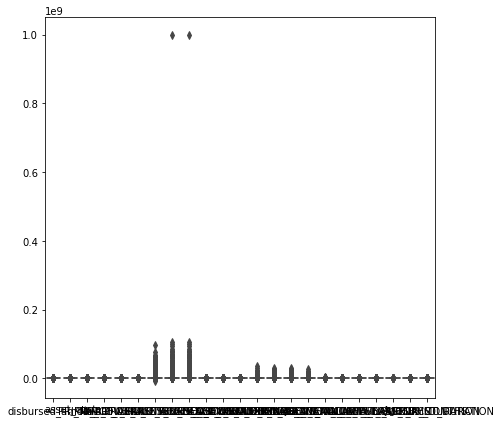

In [132]:
# View the outlier in the continuous variables

sns.boxplot(data=LoanData[LoanData_continuous])

#### Removing Outliers by flooring and capping

In [133]:
# Flooring and Capping 
# Remove the outliers in the continuous variables 

for i in LoanData[LoanData_continuous]: 
    q1, q3 = LoanData[i].quantile([0.25,0.75])
    iqr=q3-q1
    upper = q3+1.5*iqr 
    lower= q1-1.5*iqr 
    
    LoanData[i]=np.where(LoanData[i]> upper, upper , LoanData[i] )
    LoanData[i]= np.where(LoanData[i]<lower , lower, LoanData[i])

<AxesSubplot:>

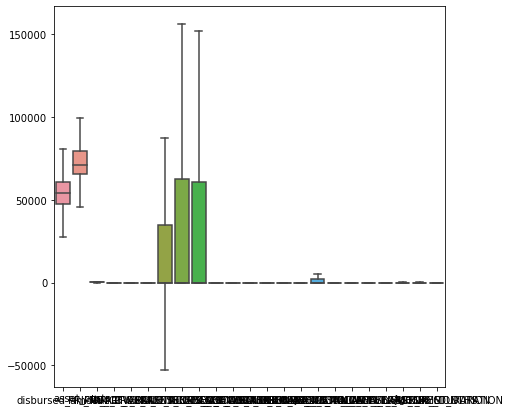

In [134]:
# View the continuous variables after flooring and capping the outliers

sns.boxplot(data=LoanData[LoanData_continuous])

In [135]:
# View the boxplot separately for the variables - do subplots

##### Model Building

In [136]:
LoanData.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,Age,CREDIT_HISTORY_DURATION,AVERAGE_ACCT_DURATION
0,50578.0,58400.0,89.55,67,22807,45,1441,1,6,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0,37.0,0.0,0.0
1,53278.0,61360.0,89.63,67,22807,45,1497,2,6,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0,36.0,0.0,0.0
2,52378.0,60300.0,88.39,67,22807,45,1495,2,6,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,1,44.0,0.0,0.0
3,46349.0,61500.0,76.42,67,22807,45,1502,1,6,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0,33.0,0.0,0.0
4,43594.0,78256.0,57.50,67,22744,86,1499,2,6,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0,0.0,0.0


In [137]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   disbursed_amount                     233154 non-null  float64 
 1   asset_cost                           233154 non-null  float64 
 2   ltv                                  233154 non-null  float64 
 3   branch_id                            233154 non-null  category
 4   supplier_id                          233154 non-null  category
 5   manufacturer_id                      233154 non-null  category
 6   Current_pincode_ID                   233154 non-null  category
 7   Employment_Type                      233154 non-null  category
 8   State_ID                             233154 non-null  category
 9   Employee_code_ID                     233154 non-null  category
 10  PERFORM_CNS_SCORE                    233154 non-null  category
 11  

In [138]:
# Save the dataframe to a new Excel document

LoanData.to_excel("LoanData_newcopy3.xlsx")

In [139]:
# Separate the Target varible from the dataframe 
# Separate Test and Train data

X = LoanData.drop('loan_default', axis =1 )
y = LoanData.loan_default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
# View the number of records in the Training dataset

X_train.shape

(156213, 31)

In [141]:
# View the number of records in the Testing dataset

X_test.shape

(76941, 31)

#### Logistic Regression

In [142]:
lg=LogisticRegression()    

In [143]:
# Build model by fitting the training data in logistic regression

lg.fit(X_train, y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
# Predict the target by testing the model on the test data

pred=lg.predict(X_test)

In [145]:
# Build a confusion matrix to verify the True Positive, True Negative, False Positive, False Negative values

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[60451,    13],
       [16476,     1]], dtype=int64)

In [146]:
# False Negative -  , False Positive - 

#### Confusion Matrix

In [147]:
plt.rcParams['figure.figsize'] = (5,5)

Text(0.5, 320.8, 'Predicted label')

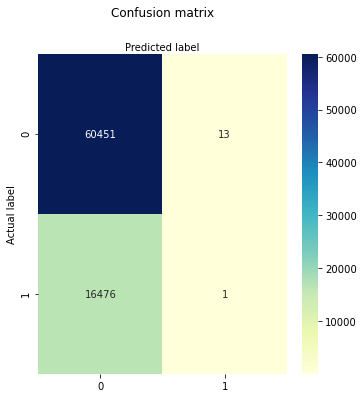

In [148]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
# Generate classification report

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     60464
           1       0.07      0.00      0.00     16477

    accuracy                           0.79     76941
   macro avg       0.43      0.50      0.44     76941
weighted avg       0.63      0.79      0.69     76941



In [150]:
# Sensitivity - 

In [151]:
# To improvise the model - reduce False Negative as posibile.
# Generate probability value for the test data

prob=lg.predict_proba(X_test)
prob

array([[0.68104945, 0.31895055],
       [0.71669765, 0.28330235],
       [0.68773621, 0.31226379],
       ...,
       [0.75915804, 0.24084196],
       [0.75313099, 0.24686901],
       [0.81253109, 0.18746891]])

In [152]:
# View the probability of 1

prob=prob[:,1]

In [153]:
prob

array([0.31895055, 0.28330235, 0.31226379, ..., 0.24084196, 0.24686901,
       0.18746891])

In [154]:
# Build a ROC curve with the predicted target values
# roc_curve function gives false positive rate fpr, true positive rate tpr, and threshold _

fpr,tpr,_=roc_curve(y_test,prob)

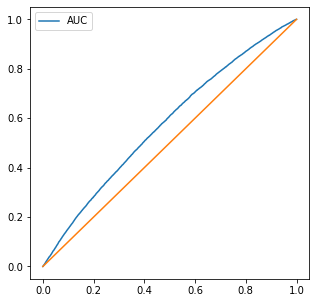

In [155]:
# View the Area Under the curve, plot using false positive rate and true positive rate

plt.plot(fpr,tpr, label='AUC')
plt.plot([0,1],[0,1])
plt.legend()

In [156]:
# Make new prediction by changing the default threshold .5 to .3 for the predicted probability values

pred_new=np.where(prob > 0.3, 1,0 )

In [157]:
# Generate a confusion matrix with the new predicted values

cnf_matrix_new = confusion_matrix(y_test, pred_new)
cnf_matrix_new

array([[53737,  6727],
       [13698,  2779]], dtype=int64)

In [158]:
# False Negative - 13698, False Positive - 6727

Text(0.5, 320.8, 'Predicted label')

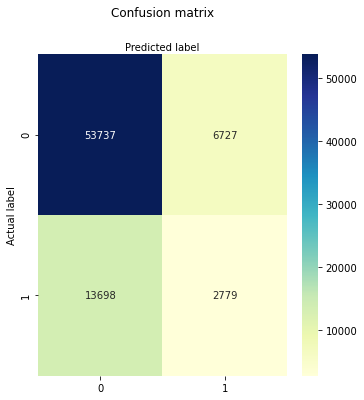

In [159]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix_new, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [160]:
# Generate classification report with the new predicted values

print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     60464
           1       0.29      0.17      0.21     16477

    accuracy                           0.73     76941
   macro avg       0.54      0.53      0.53     76941
weighted avg       0.69      0.73      0.71     76941



In [161]:
# Sensitivity - 0.21

In [162]:
# Find the Varibles of importance in the dataset using RFE function

m=RFE(estimator=lg,n_features_to_select=1)

In [163]:
# Fit the training dataset in the RFE model

m.fit(X_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [164]:
# View the Ranking of the features(columns/variables) in the data set

m.ranking_

array([ 8,  9,  1,  4, 10,  3,  7, 20, 15, 12,  5, 18, 19, 28, 17, 13, 14,
       31, 21, 22, 23, 24, 25, 11, 26, 27, 29, 30,  2,  6, 16])

In [165]:
# View the Column names in the training dataset

X_train.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment_Type', 'State_ID',
       'Employee_code_ID', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'Age',
       'CREDIT_HISTORY_DURATION', 'AVERAGE_ACCT_DURATION'],
      dtype='object')

In [166]:
# View the Ranking and Column names

Ranking_CVD=pd.DataFrame(m.ranking_, X_train.columns)
Ranking_CVD.columns = {'Ranking'}
Ranking_CVD.sort_values('Ranking')

,Ranking
ltv,1
Age,2
manufacturer_id,3
branch_id,4
PERFORM_CNS_SCORE,5
CREDIT_HISTORY_DURATION,6
Current_pincode_ID,7
disbursed_amount,8
asset_cost,9
supplier_id,10
